**Tasks**

a) **all:** Define a Markov Model based on semi-annual time steps for the anticipated and deferred annuitisation of AHV

b) **Only Life Insurance Mathematics:** How do you tranform the annual incidence years to seminannual, and how do you model annuities paid 12x a year in this context. Can this type of insuance be solved by means of tradiditional life insurance mathematics (ie using commutation formular) - if possible provide the respective formuli; otherwise proof why not

c) **all:** Calculate the respective Reserves for a man aged 62. Which is the most valuable returement age? Please anser this question assuming there is a reduction in mortality as opposed to a constant mortality rate. For all following tasks assume teh mortality model including a reduction in mortality

d) **all:** Calculate the corresponding expected cash flows given one knows at which age a person will retire. Please present them as a replicating profolio in terms of zero coupon bonds ($\mathcal{Z}_n$)

e) **all:** Consider now a given ex ante distribution of retirement ages and calculate the expected reserves and cash flows assuming a man aged 62; cash flows also represented as zero coupon bonds.

f) **Selected Chapters only:** Assume the asset allocation by means of zero coupon bonds is as per d). Which retirement age poses the biggest ALM risk against this asset allocation. We assume that the ALM risk is the maximum absolute difference of the ALM mismatch as a present value if interest rates move either 1\% up or 1\% down

g) **all:** Discuss your findings and explain which asset allocation you would choose and why

**Remarks**

- We assume that the prinicpal receiver of the annuity is a male and there are two cases to consider, namely that the man is single or married. In the second case we assume that the spouse is 3 years younger.
- We assume that the yearly annuity  (for an ordinary retirement age of 65) is CHF 24'000 in both cases and that the deferred widdows pension is 80\% of the annuity.
- We choose a technical interest rate (flat yield curve) of 2\% and assume that the market interest rate is 2\% (also flat yield curve)
- The reference annuity is either reduced (in case of an anticipated retirement) or increased in case of a deferred retirment. The detailled changes are per appendix. Please note that the deferred widows pension is not changed if the (main) annuity is called earlier or later.
- Note that the maximal anticipated annuity is at age $65-2=63$ and maxium deferral is up to age $65+5=70$. In the text the corresponding increases and decreases are given for each indiviual month (eg retirening at 63 years and 4 months. To keep the complexity of the model down we *assume* that refirement can take place all 6 months, ie at ages 63y0m, 63y6m, ... ,65y0m, 65y6m, ... , 69y6m, 70y0m. 
- For the distribution of the retirement age please use the following table. Note that you need to transform this abolute table into transition probabilities. Please explain how you do this.

| year | month | retiring | cum. retiring | change in annuity |
|:---:|:---:|:---:|:---:|:---:|
 | 63 | 0 | 0.025 | 0.025 | -0.136 |
 | 63 | 6 | 0.025 | 0.05 | -0.102 |
 | 64 | 0 | 0.025 | 0.075 | -0.068 |
 | 64 | 6 | 0.025 | 0.1 | -0.034 |
 | 65 | 0 | 0.873 | 0.973 | 0 |
 | 65 | 6 | 0 | 0.973 | 0 |
 | 66 | 0 | 0.003 | 0.976 | 0.052 |
 | 66 | 6 | 0.003 | 0.979 | 0.08 |
 | 67 | 0 | 0.003 | 0.982 | 0.108 |
 | 67 | 6 | 0.003 | 0.985 | 0.139 |
 | 68 | 0 | 0.003 | 0.988 | 0.171 |
 | 68 | 6 | 0.003 | 0.991 | 0.205 |
 | 69 | 0 | 0.003 | 0.994 | 0.24 |
 | 69 | 6 | 0.003 | 0.997 | 0.277 |
 | 70 | 0 | 0.003 | 1 | 0.315 |


 **Modelling Assumptions to be taken**
 - Markov Models based on semi annual time steps
 - Mortality as per below
 - Annuities payable 12x a year (ie for the main annuity 2000 per Month) prenummerando
 - Calendar Year 2025
 - Male has gender 0 and female gender 1
 

Annuity Level [-0.136 -0.102 -0.068 -0.034  0.     0.     0.052  0.08   0.108  0.139
  0.171  0.205  0.24   0.277  0.315]
Annuity Incidence [0.025 0.025 0.025 0.025 0.873 0.    0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003]


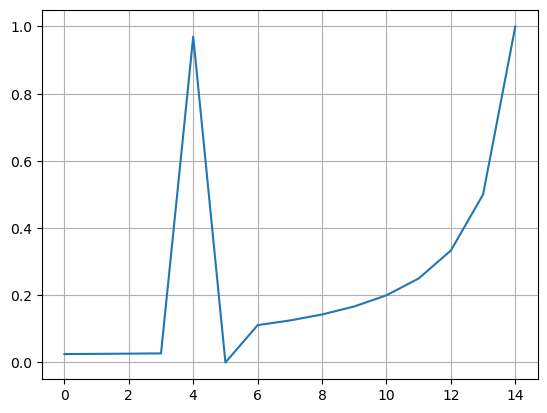

In [60]:
import numpy as np
import matplotlib.pyplot as plt

strTable = """ | 63 | 0 | 0.025 | 0.025 | -0.136 |
 | 63 | 6 | 0.025 | 0.05 | -0.102 |
 | 64 | 0 | 0.025 | 0.075 | -0.068 |
 | 64 | 6 | 0.025 | 0.1 | -0.034 |
 | 65 | 0 | 0.873 | 0.973 | 0 |
 | 65 | 6 | 0 | 0.973 | 0 |
 | 66 | 0 | 0.003 | 0.976 | 0.052 |
 | 66 | 6 | 0.003 | 0.979 | 0.08 |
 | 67 | 0 | 0.003 | 0.982 | 0.108 |
 | 67 | 6 | 0.003 | 0.985 | 0.139 |
 | 68 | 0 | 0.003 | 0.988 | 0.171 |
 | 68 | 6 | 0.003 | 0.991 | 0.205 |
 | 69 | 0 | 0.003 | 0.994 | 0.24 |
 | 69 | 6 | 0.003 | 0.997 | 0.277 |
 | 70 | 0 | 0.003 | 1 | 0.315 |"""

fLevelAnnuity=[]
fIncidenceAnnuity = []

Lines = strTable.split("\n")
for i in Lines:
    Tokens=i.split("|")
    fLevelAnnuity.append(float(Tokens[-2]))
    fIncidenceAnnuity.append(float(Tokens[-4]))   

fLevelAnnuity=np.array(fLevelAnnuity)
fIncidenceAnnuity=np.array(fIncidenceAnnuity)

print("Annuity Level", fLevelAnnuity)
print("Annuity Incidence", fIncidenceAnnuity)

def Qx(gender,x,t,param =[]):
        # This is our default mortality
        if gender == 0:
            a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
        else:
            a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
        return(min(1,max(0,np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))))

def QxNoReduction(gender,x,t,param =[]):
        # This is our default mortality
        t = 2025
        if gender == 0:
            a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
        else:
            a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
        return(min(1,max(0,np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))))

def fAusscheide(i):
    return(fIncidenceAnnuity[i]/sum(fIncidenceAnnuity[i:]))

x=[]
y=[]
for i in range(len(fIncidenceAnnuity)):
    x.append(i)
    y.append(fAusscheide(i))

plt.plot(x,y)
plt.grid(True)

def mystr(fN):
    return("%10.2f"%(fN))

In [61]:

class Markov:
    def __init__(self):
        self.iNrStates = None
        self.iMaxTime  = None    
        self.dPij = [] # for each time a matrix ie dPij[k] matrix at time k
        self.dPre = [] # Vector vector of annuities at time t
        self.dPost= []
        self.dv   = []
        # Outputs
        self.dDK  = []
        self.dDKDistr  = []
        self.dCF  = []
        self.bCalculated = False
        self.bCFCalculated = False
        self.bCalculatedDistr = False
        self.iStart = None
        self.iStop  = None
        self.fDistrLow = -1000
        self.fDistrHigh = 150000
        self.iNrBuckets = 10000
        self.fBucketWidth = (self.fDistrHigh-self.fDistrLow)/self.iNrBuckets
        self.fBucketWidthRound = self.fBucketWidth / 2.
                
    def vDefineModel(self,iNrStates,iMaxTime=1200):
        self.iNrStates = iNrStates
        self.iMaxTime = iMaxTime
        for i in range(iMaxTime):
            tempPij = np.zeros([iNrStates,iNrStates])
            tempPost = np.zeros([iNrStates,iNrStates])
            tempPre = np.zeros([iNrStates])
            tempDK = np.zeros([iNrStates])
            tempCF = np.zeros([iNrStates])
            self.dPij.append(tempPij)
            self.dPost.append(tempPost)
            self.dPre.append(tempPre)
            self.dDK.append(tempDK)
            self.dCF.append(tempCF)  
        tempv = np.zeros([iMaxTime])
        self.dv=tempv

    def strTraceMTime(self,i,bOnly = True):
        strOut = "Recursion from %d to %d \n =================== \n"%(i,i+1)
        dV = self.dv[i]
        dIRate = 1./dV - 1.
        strOut +="Discount of Period %12.6f (iRate %12.6f) \n"%(dV,dIRate)
        strOut += "Start Reserves: \n"
        for j in range(self.iNrStates):
            strOut += " t %4d State %4d: V = %12.6f \n"%(i+1,j,self.dDK[i+1][j])
        strOut += "Pij: \n"
        for j in range(self.iNrStates):
            dSum = 0
            for k in range(self.iNrStates):
                dPart = self.dPij[i][j,k]
                dSum += dPart
                dPost = self.dPost[i][j,k]
                if bOnly:
                    bPrint=False
                    if abs(dPart)>0 or abs(dPost)>0: bPrint=True
                else:
                    bPrint = True
                if bPrint: strOut += "%4d --> %4d Pij = %12.6f (%12.6f)  (Post %12.6f)\n"%(j,k,dPart,dSum, dPost)
            strOut +="------------ \n"
        strOut += "End Reserves: \n" 
        for j in range(self.iNrStates):
            dPre = self.dPre[i][j]
            strOut += " t %4d State %4d: V = %12.6f (Pre %12.6f)\n"%(i,j,self.dDK[i][j],dPre)
        return(strOut)
        
    def strTraceM(self):
        strOut =""
        for i in range(self.iStart-1, self.iStop-1,-1):
            strOut += self.strTraceMTime(i)
        return(strOut)
             
        
    def iBucketNr(self, fValue):
        if fValue < self.fDistrLow:
            return(0)
        iBNR = (int(min(self.iNrBuckets-1,(fValue-self.fDistrLow)/self.fBucketWidth+self.fBucketWidthRound)))
        return(iBNR)
    
    def fValueOfBucket(self, iBucket):
        return(self.fBucketWidth*min(self.iNrBuckets-1,iBucket)+self.fDistrLow)
    
    def vCreateDistModel(self):
        print("You Know that you can call me only once everything is done")
        for i in range(self.iMaxTime):
            tempDK = np.zeros([self.iNrStates,self.iNrBuckets])
            self.dDKDistr.append(tempDK)
    
    def vSetDiscounT(self,fIRate):# you set v
        vTemp = 1./(1.+fIRate)
        for i in range(self.iMaxTime):
            self.dv[i] = vTemp
        self.bCalculated = False
        self.bCFCalculated = False

    def vSetDiscountYield(self,t, fIRate):# you set v
        vTemp = 1./(1.+fIRate)
        self.dv[t] = vTemp
        self.bCalculated = False
        self.bCFCalculated = False
    
    def vSetPij(self,t,i,j,fValue):# you set p_{ij}(t,t+1)
        self.dPij[t][i,j] = fValue
        self.bCalculated = False
        self.bCFCalculated = False
    
    def vSetPre(self,t,i,j,fValue):# you set a_{i}^{pre}(t) 
        self.dPre[t][i] = fValue
        self.bCalculated = False
        self.bCFCalculated = False
    
    def vSetPost(self,t,i,j,fValue):# you set a_{ij}^{post}(t)
        self.dPost[t][i,j] = fValue
        self.bCalculated = False
        self.bCFCalculated = False

    def doComplementStates(self,default=None, eps = 0.0001):
        iState = self.iNrStates -1
        if default != None:
            iState = default
        for i in range(self.iNrStates):
            bFound = False
            for t in range(self.iStop,self.iStart):
                fTot = sum(self.dPij[t][i,:])
                #print(i,t,"-->",fTot)
                if abs(fTot-1.) >= eps:
                    bFound=True
                    self.dPij[t][i,default] += 1. - fTot
            if bFound:
                print("Check P(Omega) = 1 failed for iState=",i,"Target State",iState)

    def doCalculateDK(self,iStart,iStop,iAge,iState):
        self.iStop = iStop
        self.iStart = iStart
        self.bCalculated = True
        for i in range(self.iMaxTime):
            self.dDK[i] *= 0.
        
        for i in range(self.iStart-1, self.iStop-1,-1):
            #print("Calc Time", i)
            for j in range(self.iNrStates):
                self.dDK[i][j] = self.dPre[i][j]
                for k in range(self.iNrStates):
                    self.dDK[i][j] += self.dv[i]*self.dPij[i][j,k]*(self.dPost[i][j,k]+self.dDK[i+1][k])

    def doCalculateCF(self,iStart,iStop,iAge,iState,bTrace=False):
        self.iStop = iStop
        self.iStart = iStart
        self.bCFCalculated = True
        for i in range(self.iMaxTime):
            self.dCF[i] *= 0.
        
        CurrentP = np.mat(np.identity(self.iNrStates))
        if bTrace:
            print("----- ----- ----- ----- ")
        for i in range(self.iStop, self.iStart):
            if bTrace:
                print("----- ----- ----- ----- ")
                print(" Time ", i)
                print("CF BoP", self.dCF[i])
            for k in range(self.iNrStates):
                for l in range(self.iNrStates):
                    self.dCF[i][k] += CurrentP[k,l] * self.dPre[i][l]
            if bTrace:
                print("CF BoP after Pre", self.dCF[i])
            NextP = np.mat(self.dPij[i])
            if bTrace:
                print("+++++ +++++ +++++ ")
                print("CurrentP\n", CurrentP) 
                print("+++++ +++++ +++++ ")
                print("Next P\n", NextP) 
                print("+++++ +++++ +++++ ")
                
            for k in range(self.iNrStates):
                for l in range(self.iNrStates):
                    for m in range(self.iNrStates):
                        self.dCF[i+1][k] += CurrentP[k,l] * NextP[l,m] * self.dPost[i][l,m]
            if bTrace:
                print("CF EoP t", self.dCF[i])
                print("CF EoP t+1", self.dCF[i+1])
            
            CurrentP = CurrentP * NextP # This is Chapman Kolmogorov
            if bTrace:
                print("+++++ +++++ +++++ ")
                print("CurrentP EoP\n", CurrentP) 
                print("+++++ +++++ +++++ ")

    def doCalculateDKDistr(self,iStart,iStop,iAge,iState,default=None):
        self.iStop = iStop
        self.iStart = iStart
        self.bCalculatedDistr = True
        self.vCreateDistModel()
        print("default is",str(default))
        self.doComplementStates(default=default)
        for i in range(self.iMaxTime):
            self.dDKDistr[i] *= 0.
        # Set Boundary Conditions
        iIndexSwitch = self.iBucketNr(0)
        for j in range(self.iNrStates):
            value = 0.
            for l in range(self.iNrBuckets):
                if l > iIndexSwitch:
                           value = 1.
                self.dDKDistr[self.iStart][j,l] = value
        # Calculation                   
        for i in range(self.iStart-1, self.iStop-1,-1):
            print("Dirst DK Calc Time", i)
            for j in range(self.iNrStates):
                for k in range(self.iNrStates):
                    for l in range(self.iNrBuckets):
                        dNewXTPlusOne = (self.fValueOfBucket(l) - self.dPre[i][j])/self.dv[i] - self.dPost[i][j,k]
                        self.dDKDistr[i][j,l] += self.dPij[i][j,k]*(self.dDKDistr[i+1][k,self.iBucketNr(dNewXTPlusOne)])
                                      
    
    def dGetDK(self,iStart,iStop,iAge,iState):
        if (iStart != self.iStart or iStop != self.iStop or not(self.bCalculated)):
            self.doCalculateDK(iStart,iStop,iAge,iState)
        return(self.dDK[iAge][iState])

    def dGetCF(self,iStart,iStop,iAge,iState):
        if (not(self.bCFCalculated) or self.iStart != iStart or self.iStop != iStop ):
            self.doCalculateCF(iStart,iStop,iAge,iState)
        return(self.dCF[iAge][iState])
    
    def dGetDKDistr(self,iStart,iStop,iAge,iState,fValue,default=None):
        if (iStart != self.iStart or iStop != self.iStop or not(self.bCalculatedDistr)):
            temp = self.dGetDK(iStart,iStop,iAge,iState) # To be on the safe side
            self.doCalculateDKDistr(iStart,iStop,iAge,iState,default=default)
        return(self.dDKDistr[iAge][iState,self.iBucketNr(fValue)])
    
    def PrintDKs(self,iStart,iStop):
        for i in range(iStop,iStart+1):
            strTemp = " %3d :"%(i)
            for j in range(self.iNrStates):
                 strTemp += "  %7.4f "%(self.dGetDK(iStart,iStop,i,j))
            print(strTemp)
    
    def PlotDKs(self,iStart,iStop,figNr=1):
        x = []
        y = []
        for i in range(iStop,iStart+1):
            x.append(i)
            ytemp = np.zeros(self.iNrStates)
            for j in range(self.iNrStates):
                ytemp[j] = self.dGetDK(iStart,iStop,i,j)
            y.append(ytemp)
        plt.figure(figNr)
        plt.plot(x,y)
        plt.grid(True)

    def PlotCFs(self,iStart,iStop,figNr=2,bLines=True):
        import matplotlib.colors as mcolors
        if bLines:
            x=[]
            y=[]
            plt.figure(figNr)
                
            for j in range(self.iNrStates):
                x=[]
                y=[]
                for i in range(iStop,iStart+1):
                    x.append(i)
                    y.append(self.dGetCF(iStart,iStop,i,j))
                plt.plot(x,y)
            plt.grid(True)
        else:
            A= []
            for i in mcolors.TABLEAU_COLORS.keys():
                A.append(i)
            for i in mcolors.BASE_COLORS.keys():
                A.append(i)
        
            xBar =[]
            hBar =[]
            bBar =[]
            cBar =[]
            y = []
            for i in range(iStop,iStart+1):
                for j in range(self.iNrStates):
                    xBar.append(i+(j)*1./self.iNrStates)
                    hBar.append(self.dGetCF(iStart,iStop,i,j))
                    bBar.append(0)
                    cBar.append(A[j])
            
            plt.figure(figNr)
            plt.bar(xBar,hBar,bottom=bBar, width = 1./self.iNrStates,color=cBar)
            plt.grid(True)
    
    def PlotDKDistr(self,iStart,iStop, iSteps = None, iStates = [0], iDeltaT = 5, figNr=10, eps = 0.01,legTitle="",default=None):
        if iSteps == None:
            iSteps = []
            for i in range(iStop,iStart,iDeltaT):
                iSteps.append(i)
            iSteps.append(iStart)
        for i in iSteps:
            for j in iStates:
                x = []
                y = []
                for k in range(self.iNrBuckets):
                    xLoc = eps + self.fValueOfBucket(k)
                    yLoc = self.dGetDKDistr(iStart,iStop,i,j,xLoc,default=default)
                    x.append(xLoc)
                    y.append(yLoc)
    
                plt.figure(figNr)
                plt.plot(x,y)
                plt.grid(True)
                mylegend = legTitle + "Age %d - State %d"%(i,j)
                plt.title(mylegend)
                figNr+=1

In [62]:
class AHV():
    def __init__(self, psymQx, iGeburtsJahr,iCurrentAge=62,iSex1=0,iSex2=1,iDeltaXY=-3,iTZ=0.02):
        self.iCurrentAge=iCurrentAge
        self.dAnnuity = 24000
        self.dWAnnuity = 0.8*self.dAnnuity
        self.dPrem = 0
        iNrStates = 1+15+1+1
        self.symM=Markov()
        self.symM.vDefineModel(iNrStates)
        self.QxLevelJoint = 1.
        self.QxLevelWidow = 1.
        self.iStart = 2*110
        self.iStop  = 2*0
        self.iStartRet = 62*2 +1 # from 62.5 to 63
        self.iForceRet = 69*2 +1 # from 69.5 to 70
        self.fPreFactor = 7./12       #n+1/(2n); n=6 
        self.fPostFactor = 1.-self.fPreFactor
        self.stateMapper = dict()
        self.T0 = 2025
        self.iGeburtsJahr = iGeburtsJahr
        self.psymQx = psymQx
        self.iSex1=iSex1
        self.iSex2=iSex2
        self.iDeltaXY=iDeltaXY
        self.iTZ=iTZ
        iNr = 0
        for i in range(63,70):
            symb = "R"+str(i)+"0"
            self.stateMapper[symb] = iNr
            iNr +=1
            symb = "R"+str(i)+"6"
            self.stateMapper[symb] = iNr
            iNr +=1
        symb = "R"+str(70)+"0"
        self.stateMapper[symb] = iNr
        self.stateMapper["D"] = 0
        self.stateMapper["W"] = 16
        
        #print(self.stateMapper)

    def GetHyPx(self,px):
        return(px**0.5)
                 
    def fKorrOld(self,i):
    # Probability that at death of man a widows pension is due (simplifiying from 4 to 2 state model)
    # We assume that the couple is both alive at self.iCurrentAge
    # Hence correction is P[Ty>=k | Tx=k] = P[Ty>=k | Tx>=k] * qx
        if i <= 2* self.iCurrentAge: return(1.)
        px = 1
        py = 1
        for j in range(self.iCurrentAge, int(0.001+i/2)):
            currentYear = self.iGeburtsJahr + j
            px *= (1-self.psymQx(self.iSex1,j,currentYear))
            py *= (1-self.psymQx(self.iSex2,j+self.iDeltaXY,currentYear))
        return(py)

    def fKorr(self,i):
    # Probability that at death of man a widows pension is due (simplifiying from 4 to 2 state model)
    # We assume that the couple is both alive at self.iCurrentAge
    # Hence correction is P[Ty>=k | Tx=k] = P[Ty>=k | Tx>=k] * qx
        if i <= 2* self.iCurrentAge: return(1.)
        py = 1
        for j in range(2*self.iCurrentAge, i):
            currentYear = self.iGeburtsJahr + int(0.005+j/2)
            qyY =self.psymQx(self.iSex2,int(j/2+0.001)+self.iDeltaXY,currentYear)
            pyHY = self.GetHyPx(1-qyY)    
            py *= pyHY
        return(py)

    def iStateMapper(self,strSymbol):
        # Symbols D (Deferred) R630 etc for retiring at 63y0m
        #         W (Widow in Payment)  T (Death)
        if strSymbol == "D": return(0)
        if strSymbol == "W": return(16) 
        if strSymbol == "T": return(17)
        return(1+self.stateMapper[strSymbol])

    def dGetDK(self, yy, mm, strSymbol):
        t = 2*yy+int(0.001+mm/6)
        iState = self.iStateMapper(strSymbol)
        #print(t, iState,self.symM.dGetDK(self.iStart,self.iStop,t,iState))
        return(self.symM.dGetDK(self.iStart,self.iStop,t,iState))
        
    def vDoProbabilities(self):
        #self.T0 = 2025
        #self.iGeburtsJahr = iGeburtsJahr
        #self.psymQx = psymQx
        #Qx(self,gender,x,t,param =[])
        #self.iSex1=iSex1
        #self.iSex2=iSex2
        for i in range(self.iStop,self.iStart):
            fKorr = self.fKorr(i)
            dRetirement = 0 
            if i in range(self.iStartRet,self.iForceRet+1):
                dRetirement = fAusscheide(i-self.iStartRet)
                iTargetState = 1+i-self.iStartRet
            currentYear = self.iGeburtsJahr + int(i/2+0.001)
            qxY =self.psymQx(self.iSex1,int(i/2+0.001),currentYear)
            qyY =self.psymQx(self.iSex2,int(i/2+0.001)+self.iDeltaXY,currentYear)
            pxHY = self.GetHyPx(1-qxY) 
            qxHY = 1. - pxHY
            pyHY = self.GetHyPx(1-qyY) 
            qyHY = 1. - pyHY
            for j in range(0,16):
                if j == 0 and dRetirement > 0:
                    self.symM.vSetPij(i,0,0,pxHY*(1-dRetirement))
                    self.symM.vSetPij(i,0,iTargetState,pxHY*(dRetirement))
                    self.symM.vSetPij(i,0,self.iStateMapper("W"),qxHY*fKorr)
                else:
                    if j != 0 or i<= self.iForceRet+1:
                        self.symM.vSetPij(i,j,j,pxHY)
                        self.symM.vSetPij(i,j,self.iStateMapper("W"),qxHY*fKorr)
            self.symM.vSetPij(i,self.iStateMapper("W"),self.iStateMapper("W"),pyHY)
            self.symM.vSetPij(i,self.iStateMapper("W"),self.iStateMapper("T"),qyHY)

    def vDoDiscount(self):
        iTZ = (1+self.iTZ)**0.5-1.
        #print("TZ (HY)",iTZ)
        self.symM.vSetDiscounT(iTZ)

    def vSetBenefits(self, dAnnuity, dWidowsAnnuity, dPremium):
        for i in range(self.iStop,self.iStart):
            dAnnuityPaid = 0 * dAnnuity
            iRetirementAge = self.iStartRet + 1
            for j in range(0,16):
                if j>0: 
                    dAnnuityPaid = 0.5 * dAnnuity
                    iRetirementAge = self.iStartRet + j
                if i >= iRetirementAge:
                    dPremPre = 0
                    dPremPost= 0
                    dAnnPre =self.fPreFactor * dAnnuityPaid *(1+fLevelAnnuity[j-1])
                    dAnnPost =self.fPostFactor * dAnnuityPaid*(1+fLevelAnnuity[j-1])
                else:
                    dPremPre = self.fPreFactor * dPremium *0.5
                    dPremPost =self.fPostFactor * dPremium*0.5
                    dAnnPre = 0
                    dAnnPost= 0 
                #if i==130: print(i,j,dAnnPre, dPremPre)
                
                self.symM.vSetPre(i,j,j,dAnnPre+dPremPre)
                self.symM.vSetPost(i,j,j,dAnnPost+dPremPost)
                #Please check the following
                self.symM.vSetPost(i,j,16,dAnnPost+dPremPost)

            j=16
            dAnnPre =self.fPreFactor * dWidowsAnnuity * 0.5
            dAnnPost =self.fPostFactor * dWidowsAnnuity * 0.5
            self.symM.vSetPre(i,j,j,dAnnPre)
            self.symM.vSetPost(i,j,j,dAnnPost)

    def dCalcPremium(self, strSymbol="R650", iYY=20, iMM=0):
        self.vDoProbabilities()
        self.vDoDiscount()
        self.vSetBenefits(self.dAnnuity, self.dWAnnuity, 0)
        dLBW = self.dGetDK(iYY,iMM,strSymbol)
        self.vSetBenefits(0,0,1)
        dPBW = self.dGetDK(iYY,iMM,strSymbol)
        dPrem = dLBW/dPBW
        self.dPrem = -dPrem
        strOut=""
        strOut+="Calc Premium for "+strSymbol+"\n"
        strOut+="Age YY %d MM %d"%(iYY,iMM)+"\n"
        strOut += "%-10s: %10.2f \n"%("LBW", dLBW) 
        strOut += "%-10s: %10.2f \n"%("LPW", dPBW) 
        strOut += "%-10s: %10.2f \n"%("Prem", dPrem)
        print(strOut)
        return(dPrem)

    def GetDKs(self, age, symSetOfStates, mm=0, strName ="Calculation of DK \n"):
        strOut = strName
        for i in symSetOfStates:
            fDK = self.dGetDK(age, mm, i)
            strOut += "Age %d State %5s: %10.2f \n"%(age, i, fDK)
        print(strOut)
        return(strOut)

    def GetDKsParts(self, age, symSetOfStates, fAnn, fWAnn, fP, mm=0, strName ="DK by Part \n"):
        strOut = strName + "Age %d \n"%(age)
        strTemplate = "|%5s| %-13s | %-13s | %-13s | %-13s|\n"
        strOut += strTemplate%("-----","-------------","-------------","-------------","-------------")
        strOut += strTemplate%("Symb","    AR","   WR","   P", "   Tot")
        strOut += strTemplate%("-----","-------------","-------------","-------------","-------------")
        for i in symSetOfStates:
            self.vSetBenefits(fAnn,0,0)
            fDKA = self.dGetDK(age, mm, i)
            self.vSetBenefits(0,fWAnn,0)
            fDKW = self.dGetDK(age, mm, i)
            self.vSetBenefits(0,0,fP)
            fDKP = self.dGetDK(age, mm, i)
            strOut += strTemplate%(str(i), mystr(fDKA),mystr(fDKW),mystr(fDKP),mystr(fDKA+fDKW+fDKP))
        strOut += strTemplate%("-----","-------------","-------------","-------------","-------------")
        print(strOut)
        return(strOut)

    def vCalcReplPortfolio(self, age, symStartSymbol, mm = 0):
        a = np.zeros(100)
        iState = self.iStateMapper(symStartSymbol)
        for i in range(100):
            a[i] = self.symM.dGetCF(self.iStart,2*age,2*(age+i),iState)
            a[i] += self.symM.dGetCF(self.iStart,2*age,2*(age+i)+1,iState)
        return(a)

    def dReclaculatePVCF(self, age, dValuationInterestRate):
        return()

    def vTask_c(self):
        return

    def vTask_d(self):
        return

    def vTask_e(self):
        return

    def vTask_f(self):
        return

    def vTask_g(self):
        return
        

0 20 6402.979424848041
1 20 965.4821076753193
2 20 1264.4425585345068
3 20 1330.340173604229
4 20 1168.5874799320084
5 20 786.5217769578509
6 20 -5030.273241328742
7 20 -3002.6490559948916
8 20 -4811.629117023301
9 20 -6766.297590904725
10 20 -8452.649825010189
11 20 -10165.872580234494
12 20 -11784.8618001224
13 20 -13450.442708897304
14 20 -15048.465346652845
15 20 -16710.603279378647
16 20 741709.4225861186
17 20 0.0


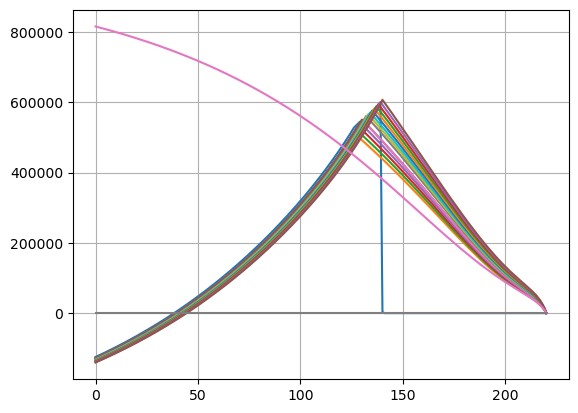

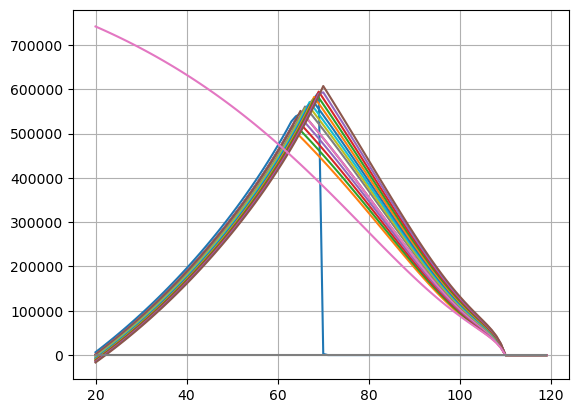

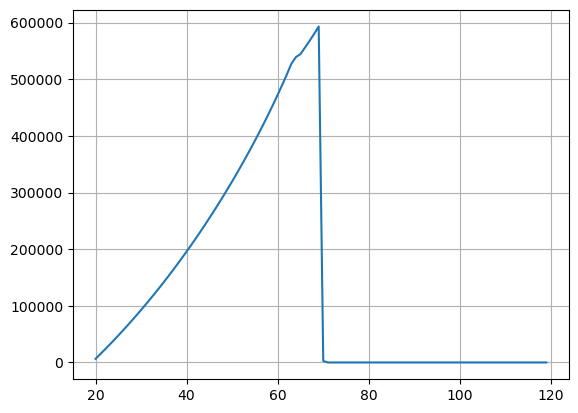

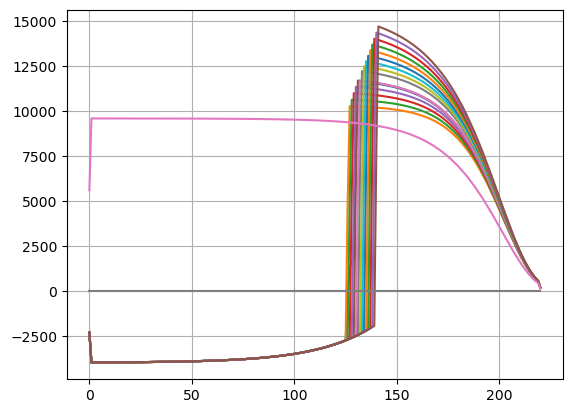

In [63]:

aa=AHV(Qx,1964)
aa.vDoProbabilities()
aa.vDoDiscount()
aa.vSetBenefits(24000,0.8*24000 , -7950.71)
aa.symM.PlotDKs(aa.iStart,aa.iStop)

plt.figure(2)
for i in range(18):
    x=[]
    y=[]
    for j in range(20,120):
        x.append(j)
        t=2*j
        y.append(aa.symM.dGetDK(aa.iStart,aa.iStop,t,i))
    plt.plot(x,y)
    print(i, x[0],y[0])
plt.grid(True)

plt.figure(3)
for i in range(1):
    x=[]
    y=[]
    for j in range(20,120):
        x.append(j)
        t=2*j
        y.append(aa.symM.dGetDK(aa.iStart,aa.iStop,t,i))
    plt.plot(x,y)
plt.grid(True)
aa.symM.PlotCFs(aa.iStart,aa.iStop,figNr=4)

In [64]:
a=AHV(Qx,1964,iCurrentAge=62)
a.dCalcPremium()
a.dCalcPremium(strSymbol="R630")
a.dCalcPremium(strSymbol="R636")
a.dCalcPremium(strSymbol="R700")

a.dCalcPremium(strSymbol="D")

Calc Premium for R650
Age YY 20 MM 0
LBW       :  232683.84 
LPW       :      29.17 
Prem      :    7977.68 

Calc Premium for R630
Age YY 20 MM 0
LBW       :  226861.79 
LPW       :      28.41 
Prem      :    7984.69 

Calc Premium for R636
Age YY 20 MM 0
LBW       :  228692.86 
LPW       :      28.60 
Prem      :    7994.91 

Calc Premium for R700
Age YY 20 MM 0
LBW       :  228715.89 
LPW       :      30.87 
Prem      :    7409.36 

Calc Premium for D
Age YY 20 MM 0
LBW       :  232283.26 
LPW       :      28.41 
Prem      :    8176.09 



8176.0870527557545

In [65]:
age=20
fAnn=24000
fWAnn= 0.8*24000 
fP=0 
symSetOfStates = []
for i in a.stateMapper.keys():
    symSetOfStates.append(i)
    
x=aa.GetDKsParts(age, symSetOfStates, fAnn, fWAnn, fP)
age=62
x=aa.GetDKsParts(age, symSetOfStates, fAnn, fWAnn, fP)

DK by Part 
Age 20 
|-----| ------------- | ------------- | ------------- | -------------|
| Symb|     AR        |    WR         |    P          |    Tot       |
|-----| ------------- | ------------- | ------------- | -------------|
| R630|  152068.43    |   74793.36    |       0.00    |  226861.79   |
| R636|  153899.51    |   74793.36    |       0.00    |  228692.86   |
| R640|  155476.16    |   74793.36    |       0.00    |  230269.52   |
| R646|  156804.12    |   74793.36    |       0.00    |  231597.47   |
| R650|  157890.48    |   74793.36    |       0.00    |  232683.84   |
| R656|  153521.16    |   74793.36    |       0.00    |  228314.52   |
| R660|  156975.05    |   74793.36    |       0.00    |  231768.41   |
| R666|  156571.45    |   74793.36    |       0.00    |  231364.80   |
| R670|  156001.01    |   74793.36    |       0.00    |  230794.36   |
| R676|  155678.05    |   74793.36    |       0.00    |  230471.41   |
| R680|  155307.11    |   74793.36    |       0.00    |  

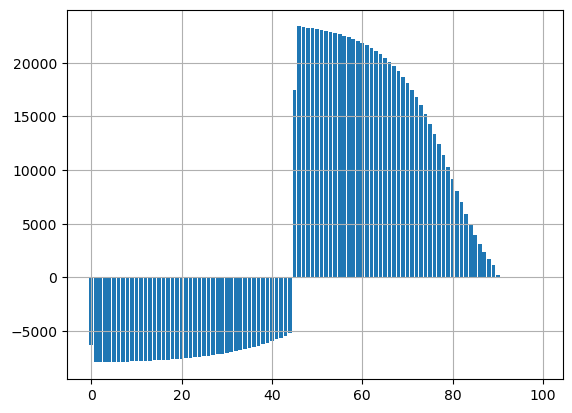

In [66]:
aa.vSetBenefits(24000,0.8*24000 , -7950.71)
y=aa.vCalcReplPortfolio(20, "R650", mm = 0)
plt.bar(range(len(y)),y)
plt.grid(True)

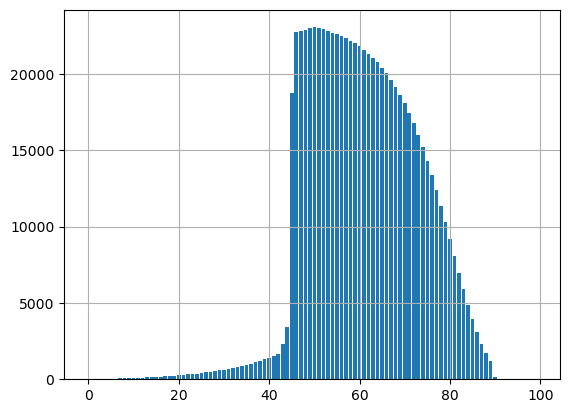

In [67]:
aa.vSetBenefits(24000,0.8*24000 , 0)
y=aa.vCalcReplPortfolio(20, "D", mm = 0)
plt.bar(range(len(y)),y)
plt.grid(True)

In [68]:
test =AHV(QxNoReduction,1964)
test.dCalcPremium()
x=test.GetDKsParts(20, symSetOfStates, fAnn, fWAnn, fP)
age=65
x=test.GetDKsParts(age, symSetOfStates, fAnn, fWAnn, fP)

Calc Premium for R650
Age YY 20 MM 0
LBW       :  209860.78 
LPW       :      29.33 
Prem      :    7155.83 

DK by Part 
Age 20 
|-----| ------------- | ------------- | ------------- | -------------|
| Symb|     AR        |    WR         |    P          |    Tot       |
|-----| ------------- | ------------- | ------------- | -------------|
| R630|  140756.57    |   65310.99    |       0.00    |  206067.56   |
| R636|  142084.60    |   65310.99    |       0.00    |  207395.59   |
| R640|  143155.29    |   65310.99    |       0.00    |  208466.28   |
| R646|  143974.45    |   65310.99    |       0.00    |  209285.44   |
| R650|  144549.79    |   65310.99    |       0.00    |  209860.78   |
| R656|  140122.87    |   65310.99    |       0.00    |  205433.86   |
| R660|  142821.90    |   65310.99    |       0.00    |  208132.89   |
| R666|  141984.36    |   65310.99    |       0.00    |  207295.35   |
| R670|  140980.07    |   65310.99    |       0.00    |  206291.06   |
| R676|  140182.69